### 09 总成本与总产出的关系-虚拟变量分段线性回归
#### P313
#### Y表示总成本，X表示总产出，研究X的变化对Y的影响
#### 我们被告知，总成本在产出为5500个单位时，可能会改变斜率。

In [22]:
import pandas as pd
import numpy as np 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [23]:
df=pd.read_excel('data/总成本与产出2.xls')

In [24]:
df.head()

,Y,X
0,256,1000
1,414,2000
2,634,3000
3,778,4000
4,1003,5000


In [25]:
df.describe()

,Y,X
count,10.000000,10.000000
mean,1507.600000,5500.000000
std,1003.945904,3027.650354
min,256.000000,1000.000000
25%,670.000000,3250.000000
50%,1421.000000,5500.000000
75%,2337.500000,7750.000000
max,2914.000000,10000.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Y    10 non-null int64
X    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


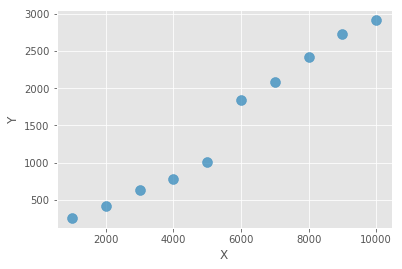

In [27]:
df.plot(kind='scatter',x='X',y='Y',s=100,alpha=0.75)

In [28]:
df['XK']=5500

In [29]:
df['D']=0

In [30]:
df['D'][df['X']>5500]=1

In [31]:
df['X2']=df['X']-df['XK']

In [32]:
df['D2']=df['X2']*df['D']

In [33]:
df

,Y,X,XK,D,X2,D2
0,256,1000,5500,0,-4500,0
1,414,2000,5500,0,-3500,0
2,634,3000,5500,0,-2500,0
3,778,4000,5500,0,-1500,0
4,1003,5000,5500,0,-500,0
5,1839,6000,5500,1,500,500
6,2081,7000,5500,1,1500,1500
7,2423,8000,5500,1,2500,2500
8,2734,9000,5500,1,3500,3500
9,2914,10000,5500,1,4500,4500


In [34]:
results = smf.ols('Y ~ 1 +X+D2', data=df).fit()

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     129.6
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           2.95e-06
Time:                        17:58:21   Log-Likelihood:                -64.588
No. Observations:                  10   AIC:                             135.2
Df Residuals:                       7   BIC:                             136.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -145.7167    176.734     -0.824      0.4

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


平均数:  $\overline{x}$ <br/>
估计值:  $\hat{y}$ <br/>
下标i:  $y_{i}$ <br/>
 $\alpha$ , $\beta$, $\star$ ,$\ast$<br/>
 $X^{2}$

$\hat{Y}_{i}=-145.72+0.2791X_{i}+0.0945(X_{i}-X^{\ast}_{i})D_{i}
       \\
\,\,\, t=(-0.824)\,\,\,\,\,\,(6.067)  \qquad   (1.145)
\\
R^{2}=0.9737  \qquad  X^\ast=5500 $

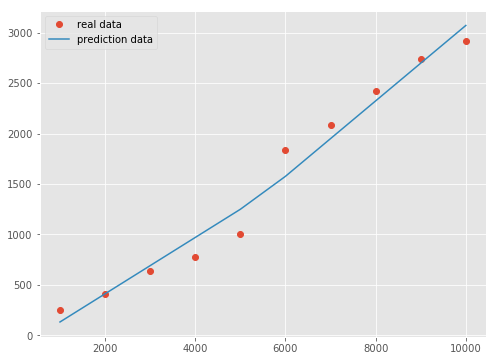

In [36]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df.X, df.Y, 'o', label="real data")
ax.plot(df.X,results.predict(),label="prediction data")
plt.legend()

In [37]:
np.exp(2.1763)

8.8136354039169937